In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import erf

In [ ]:
df = pd.read_csv("/content/teen_phone_addiction_dataset.csv")

In [ ]:
N = 18
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Social_Media'

Просмотр данных


In [ ]:
col = df["Time_on_Social_Media"]
col.info()
col.head()
#col = df["Time_on_Social_Media"].dropna()

<class 'pandas.core.series.Series'>
RangeIndex: 3000 entries, 0 to 2999
Series name: Time_on_Social_Media
Non-Null Count  Dtype  
--------------  -----  
3000 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


,Time_on_Social_Media
0,3.6
1,1.1
2,0.3
3,3.1
4,2.6


## I. Рассчитайте характеристики:
1.   Среднее
2.   Дисперсия


1.   Мода
2.   Медиана


1.   Квантили уровня 0.25, 0.5, 0.75
2.  Эксцесс

1.   Ассиметрия
2.   Интерквартильный размах

In [ ]:
def column_stats(col: pd.Series):
    stats = {
        "Среднее": col.mean(),
        "Дисперсия": col.var(),
        "Медиана": col.median(),
        "Мода": col.mode().iloc[0] if not col.mode().empty else None,
        "Квантиль 0.25": col.quantile(0.25),
        "Квантиль 0.50": col.quantile(0.50),
        "Квантиль 0.75": col.quantile(0.75),
        "Интерквартильный размах": col.quantile(0.75) - col.quantile(0.25),
        "Эксцесс": col.kurtosis(),
        "Асимметрия": col.skew(),
    }

    for k, v in stats.items():
        print(f"{k:25} {v:.4f}" if isinstance(v, (int, float)) else f"{k:25} {v}")

column_stats(col)

Среднее                   2.4992
Дисперсия                 0.9765
Медиана                   2.5000
Мода                      2.7000
Квантиль 0.25             1.8000
Квантиль 0.50             2.5000
Квантиль 0.75             3.2000
Интерквартильный размах   1.4000
Эксцесс                   -0.2132
Асимметрия                0.0670


# Построить графики:

1. Гистограмма
2. Эмпирическая функция распределения

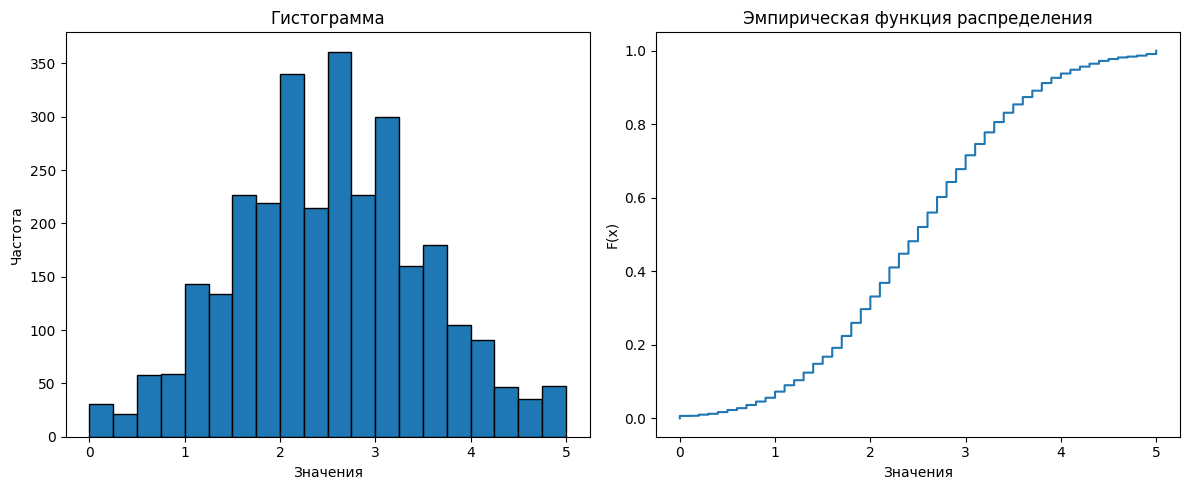

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(col, bins=20, edgecolor="black")
plt.title("Гистограмма")
plt.xlabel("Значения")
plt.ylabel("Частота")

plt.subplot(1,2,2)
sorted_col = np.sort(col)
ecdf = np.arange(1, len(col)+1) / len(col)
plt.step(sorted_col, ecdf, where="post")
plt.title("Эмпирическая функция распределения")
plt.xlabel("Значения")
plt.ylabel("F(x)")

plt.tight_layout()
plt.show()

In [ ]:
def plot_histogram(series: pd.Series, bins: int = None):
    series = series.dropna()
    mean_val = series.mean()
    median_val = series.median()

    # число интервалов (по Стерджессу, если не задано)
    if bins is None:
        bins = int(np.log2(len(series)) + 1)

    plt.hist(series, bins=bins, density=True,
             color="skyblue", edgecolor="black", alpha=0.9)

    plt.axvline(mean_val, color="red", linestyle="--", linewidth=2,
            label=f"Среднее = {mean_val:.2f}")
    plt.axvline(median_val, color="orange", linestyle=":", linewidth=2,
            label=f"Медиана = {median_val:.2f}")

    plt.title("Гистограмма распределения")
    plt.xlabel("Значения")
    plt.ylabel("Плотность")
    plt.legend()
    plt.grid(alpha=0.3)


def plot_ecdf(series: pd.Series):
    series = series.dropna()
    x = np.sort(series)
    y = np.arange(1, len(x) + 1) / len(x)

    plt.step(x, y, where="post", color="darkblue", linewidth=2, label="ЭФР")

    plt.title("Эмпирическая функция распределения")
    plt.xlabel("Значения")
    plt.ylabel("F(x)")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(alpha=0.3)


def plot_distribution(series: pd.Series):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plot_histogram(series)

    plt.subplot(1, 2, 2)
    plot_ecdf(series)

    plt.tight_layout()
    plt.show()

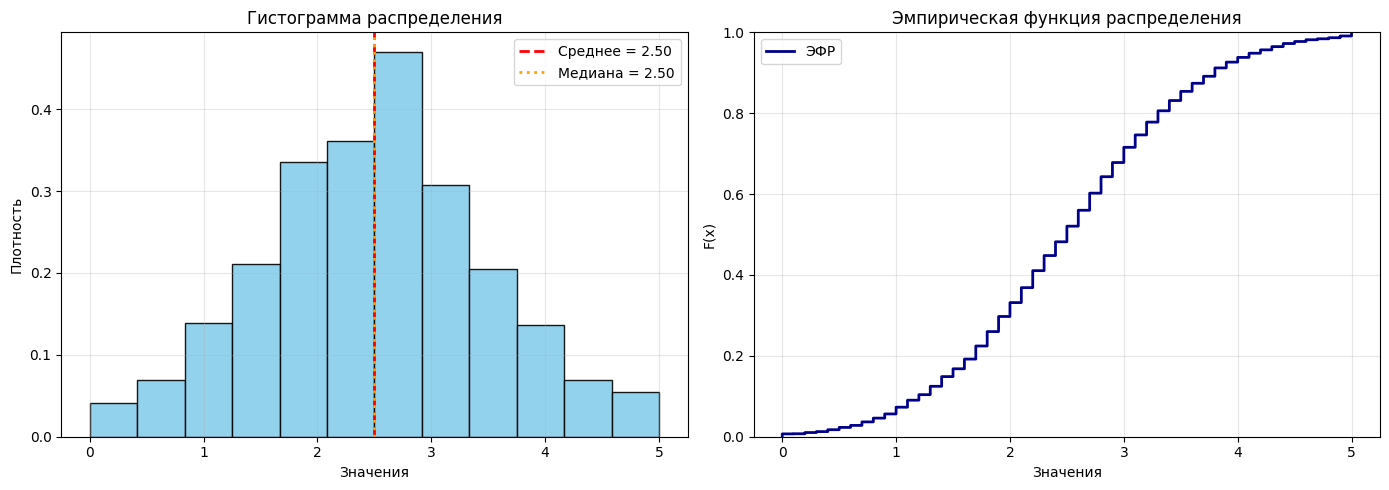

In [ ]:
plot_distribution(col)


# Выводы по первому пункту


1. Центр распределения: Среднее = 2.499, Медиана = 2.5, Мода = 2.7.
→ Распределение почти симметричное, небольшое смещение к большим значениям (мода > медианы).

2. Разброс данных: Дисперсия = 0.977, IQR = 1.4 (Q1 = 1.8, Q3 = 3.2).
→ Большинство значений находится в диапазоне [1.8, 3.2], разброс умеренный.

3. Форма распределения: Асимметрия = 0.067, Эксцесс = -0.213.
→ Распределение практически симметричное, близкое к нормальному, хвосты не выражены(плоская форма распределения), так как эксцесс отрицательный, выбросов нет.

Вывод: Данные стабильные(эксцесс и асимметрия близки к нулю), практически симметричные(центр около 2,5), без сильных перекосов(небольшая асимметрия вправо), большинство значений находятся между 1.8 и 3.2.

# II. Проверить данные на нормальность, используя критерии:

1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

In [ ]:
def chi2_normality_test(series: np.ndarray, alpha=0.05):
    series = np.array(series)
    n = len(series)

    # 1. Выборочные параметры
    mu = np.mean(series)
    sigma = np.std(series, ddof=1)
    print(f"Выборочное среднее: {mu:.4f}, стандартное отклонение: {sigma:.4f}")

    # 2. Интервалы по Стерджессу
    k = int(1 + np.log2(n))
    edges = np.linspace(np.min(series), np.max(series), k + 1)
    observed, _ = np.histogram(series, bins=edges)

    # 3. Ожидаемые частоты
    expected_probs = stats.norm.cdf(edges[1:], loc=mu, scale=sigma) - stats.norm.cdf(edges[:-1], loc=mu, scale=sigma)
    expected = expected_probs * n

    # 4. Объединяем интервалы с маленькими частотами (<5)
    obs_combined, exp_combined = [], []
    temp_obs, temp_exp = 0, 0

    for o, e in zip(observed, expected):
        temp_obs += o
        temp_exp += e
        if temp_exp >= 5:
            obs_combined.append(temp_obs)
            exp_combined.append(temp_exp)
            temp_obs, temp_exp = 0, 0
    if temp_exp > 0:
        obs_combined.append(temp_obs)
        exp_combined.append(temp_exp)

    obs_combined = np.array(obs_combined)
    exp_combined = np.array(exp_combined)

    print(f"\nЧисло интервалов: {len(obs_combined)}")
    print(f"Наблюдаемые частоты: {obs_combined}")
    print(f"Ожидаемые частоты: {exp_combined.round(2)}")

    # 5. Рассчитываем χ²
    chi_sq = np.sum((obs_combined - exp_combined)**2 / exp_combined)
    df = len(obs_combined) - 1 - 2  # минус оцененные параметры μ и σ
    print(f"\nχ² = {chi_sq:.4f}, степени свободы = {df}")

    if df <= 0:
        print("Недостаточно степеней свободы для теста")
        return

    critical = stats.chi2.ppf(1 - alpha, df)
    p_value = 1 - stats.chi2.cdf(chi_sq, df)

    print(f"Критическое значение при α={alpha}: {critical:.4f}")
    print(f"p-value: {p_value:.4f}")

    if chi_sq <= critical:
        print("Вывод: данные соответствуют нормальному распределению")
    else:
        print("Вывод: данные не соответствуют нормальному распределению")
chi2_normality_test(col, alpha=0.05)

Выборочное среднее: 2.4992, стандартное отклонение: 0.9882

Число интервалов: 12
Наблюдаемые частоты: [ 52  86 174 264 419 451 588 384 256 171  87  68]
Ожидаемые частоты: [ 35.47  85.13 171.51 289.99 411.52 490.15 489.99 411.13 289.52 171.12
  84.89  35.34]

χ² = 68.8569, степени свободы = 9
Критическое значение при α=0.05: 16.9190
p-value: 0.0000
Вывод: данные не соответствуют нормальному распределению


# Вывод по критерию χ²

Проверка распределения данных с помощью критерия хи-квадрат показала, что гипотеза о нормальности отвергается при уровне значимости α = 0.05.

Статистика χ² равна 68.86 при 9 степенях свободы, что заметно выше порогового значения 16.92. P-value почти равно нулю(< 0.0001), что указывает на крайне низкую вероятность получить такие данные, если бы они действительно были нормальными.

Сравнение наблюдаемых и теоретических частот показывает систематические расхождения:

Центральные интервалы (5–7) имеют наблюдаемые частоты 419, 451 и 588, в то время как ожидаемые частоты по нормальному закону составляют примерно 411.52, 490.15 и 489.99.

В крайних интервалах («хвостах») тоже есть заметные отклонения от нормальной модели (52 и 35.47, 68 и 35ю34).

Итог: данные явно не соответсвуют нормальному распределению, с особенно выраженными расхождениями в центре и на краях.

In [ ]:
def check_skew_kurtosis(series: np.ndarray, alpha=0.05):
    n = len(series)

    # Рассчёт асимметрии и эксцесса
    skew_val = series.skew()
    kurt_val = series.kurtosis()

    # Стандартные ошибки
    se_skew = np.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))
    se_kurt = np.sqrt(24 * n * (n - 2) * (n - 3) / ((n + 1)**2 * (n + 3) * (n + 5)))

    # Z-статистики
    z_skew = skew_val / se_skew
    z_kurt = kurt_val / se_kurt

    # Критическое Z
    z_crit = stats.norm.ppf(1 - alpha/2)

    # Проверка
    skew_ok = abs(z_skew) <= z_crit
    kurt_ok = abs(z_kurt) <= z_crit
    overall = skew_ok and kurt_ok

    print(f"Асимметрия = {skew_val:.4f}, Z = {z_skew:.2f}, p = {2*(1-stats.norm.cdf(abs(z_skew))):.4f} → {'норма' if skew_ok else 'не норма'}")
    print(f"Эксцесс   = {kurt_val:.4f}, Z = {z_kurt:.2f}, p = {2*(1-stats.norm.cdf(abs(z_kurt))):.4f} → {'норма' if kurt_ok else 'не норма'}")
    print(f"\nОбщий вывод: Данные {'соответствуют' if overall else 'не соответствуют'} нормальному распределению")

    if not overall:
        if not skew_ok and kurt_ok:
            print("Распределение скошено, но хвосты близки к нормальному.")
        elif skew_ok and not kurt_ok:
            print("Распределение почти симметричное, но хвосты слишком плоские или острые.")
        else:
            print("Распределение несимметричное и имеет отклонения в хвостах.")

check_skew_kurtosis(col)

Асимметрия = 0.0670, Z = 1.50, p = 0.1339 → норма
Эксцесс   = -0.2132, Z = -2.39, p = 0.0169 → не норма

Общий вывод: Данные не соответствуют нормальному распределению
Распределение почти симметричное, но хвосты слишком плоские или острые.


Асимметрия близка к нулю, поэтому данные практически симметричные. Однако эксцесс выходит за пределы нормального значения, что указывает на слишком «плоские» хвосты распределения. В целом, распределение не полностью соответствует нормальному, несмотря на близкую к нормальной симметрию.

Корреляция выборочных и теоретических квантилей: 0.9983
Данные почти идеально соответствуют нормальному распределению


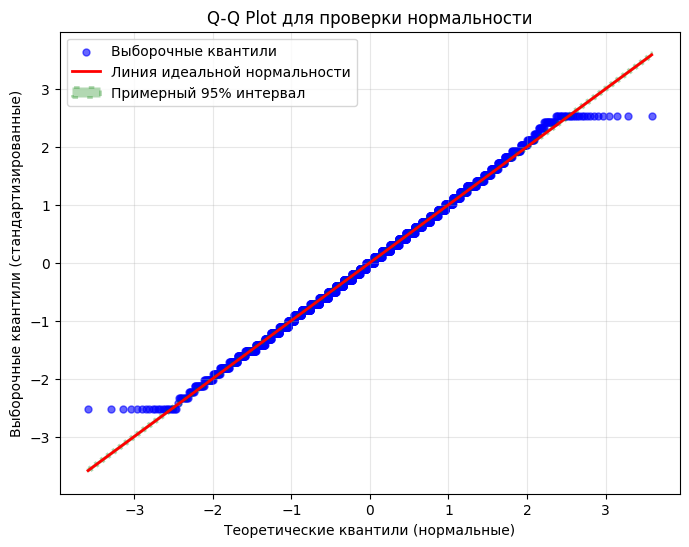

In [ ]:

def qq_plot_custom(series: np.ndarray):
    series = np.array(series)
    n = len(series)

    mean_val = np.mean(series)
    std_val = np.std(series, ddof=1)
    standardized_data = (series - mean_val) / std_val

    sorted_data = np.sort(standardized_data)

    probs = (np.arange(1, n + 1) - 0.5) / n
    theoretical_q = stats.norm.ppf(probs)

    plt.figure(figsize=(8, 6))
    plt.scatter(theoretical_q, sorted_data, color='blue', alpha=0.6, s=25, label='Выборочные квантили')

    x_line = np.linspace(min(theoretical_q.min(), sorted_data.min()),
                         max(theoretical_q.max(), sorted_data.max()), 100)
    plt.plot(x_line, x_line, color='red', linewidth=2, label='Линия идеальной нормальности')

    ci = 2 / np.sqrt(n)
    plt.fill_between(x_line, x_line - ci, x_line + ci, color='green', linestyle=":",linewidth=2,  alpha=0.3, label='Примерный 95% интервал')

    plt.xlabel("Теоретические квантили (нормальные)")
    plt.ylabel("Выборочные квантили (стандартизированные)")
    plt.title("Q-Q Plot для проверки нормальности")
    plt.grid(alpha=0.3)
    plt.legend()

    corr = np.corrcoef(theoretical_q, sorted_data)[0, 1]
    print(f"Корреляция выборочных и теоретических квантилей: {corr:.4f}")

    if corr > 0.99:
        print("Данные почти идеально соответствуют нормальному распределению")
    elif corr > 0.95:
        print("Данные хорошо приближены к нормальному распределению")
    elif corr > 0.90:
        print("Данные умеренно соответствуют нормальному распределению")
    else:
        print("Данные плохо соответствуют нормальному распределению")

    plt.show()
qq_plot_custom(col)

Результаты анализа показывают смешанную картину: некоторые критерии указывают на отклонения от нормальности (эксцесс, χ² Пирсона), тогда как другие подтверждают близость распределения к нормальному (асимметрия, Q-Q plot). Визуально распределение напоминает нормальное, однако наблюдается смещение моды вправо и плоские хвосты, что говорит о небольших отклонениях от идеальной нормальной формы.

# III. Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например, с помощью:

1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

In [ ]:
def part1and2(col):
      column_stats(col)
      plot_distribution(col)
      chi2_normality_test(col, len(col))
      check_skew_kurtosis(col, len(col))
      qq_plot_custom(col)

# Удаление, усечение выбросов

In [ ]:
def cap_outliers(series: pd.Series, low_q=0.01, high_q=0.99) -> pd.Series:
    """
    Ограничение выбросов по выбранным квантилям
    """
    low_val = series.quantile(low_q)
    high_val = series.quantile(high_q)

    capped_series = series.copy()
    capped_series[capped_series < low_val] = low_val
    capped_series[capped_series > high_val] = high_val

    return capped_series

Среднее                   2.4998
Дисперсия                 0.9653
Медиана                   2.5000
Мода                      2.7000
Квантиль 0.25             1.8000
Квантиль 0.50             2.5000
Квантиль 0.75             3.2000
Интерквартильный размах   1.4000
Эксцесс                   -0.2900
Асимметрия                0.0755


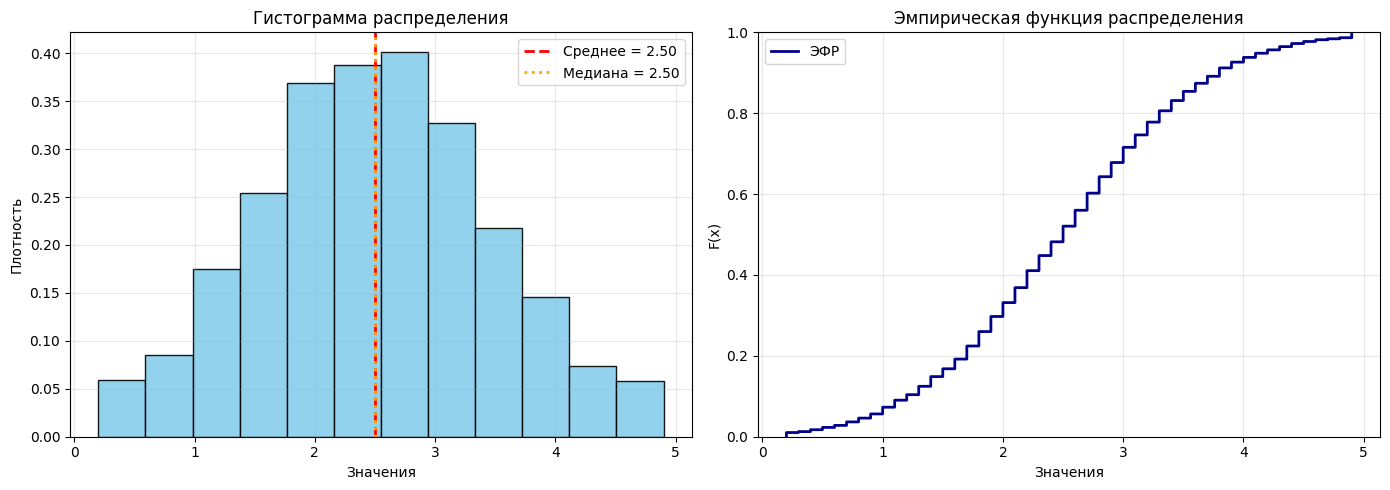

Выборочное среднее: 2.4998, стандартное отклонение: 0.9825

Число интервалов: 12
Наблюдаемые частоты: [ 69 100 205 299 433 456 472 384 256 171  87  68]
Ожидаемые частоты: [ 49.32 105.89 194.35 304.92 408.96 468.87 459.53 385.01 275.75 168.82
  88.35  39.53]

χ² = 32.9663, степени свободы = 9
Критическое значение при α=3000: nan
p-value: 0.0001
Вывод: данные не соответствуют нормальному распределению
Асимметрия = 0.0755, Z = 1.69, p = 0.0910 → не норма
Эксцесс   = -0.2900, Z = -3.25, p = 0.0012 → не норма

Общий вывод: Данные не соответствуют нормальному распределению
Распределение несимметричное и имеет отклонения в хвостах.
Корреляция выборочных и теоретических квантилей: 0.9976
Данные почти идеально соответствуют нормальному распределению


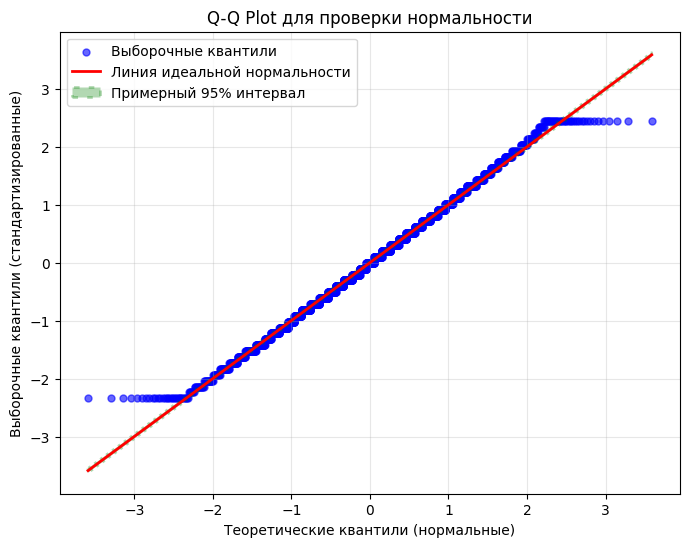

In [ ]:
time_no_outliers = cap_outliers(col, 0.01, 0.99)
part1and2(time_no_outliers)

# Вывод:
После удаления выбросов χ²-статистика уменьшилась за счёт обрезки хвостов, но остальные показатели нормальности не улучшились. Визуально распределение даже стало меньше похоже на нормальное, поэтому этот способ обработки данных неэффективен.

## Стандартизация, нормировка
Стандартизация: Среднее делаем 0, а стандартное отклонение 1

Нормировка: преобразование данных к заданному диапазону [0, 1]

In [ ]:
def standardize_series(series: pd.Series) -> pd.Series:
    """
    Стандартизация серии: среднее = 0, стандартное отклонение = 1
    """
    mean_val = series.mean()
    std_val = series.std(ddof=1)

    standardized_values = (series - mean_val) / std_val

    return pd.Series(standardized_values, index=series.index, name=series.name)

Среднее                   -0.0000
Дисперсия                 1.0000
Медиана                   0.0008
Мода                      0.2032
Квантиль 0.25             -0.7076
Квантиль 0.50             0.0008
Квантиль 0.75             0.7091
Интерквартильный размах   1.4167
Эксцесс                   -0.2132
Асимметрия                0.0670


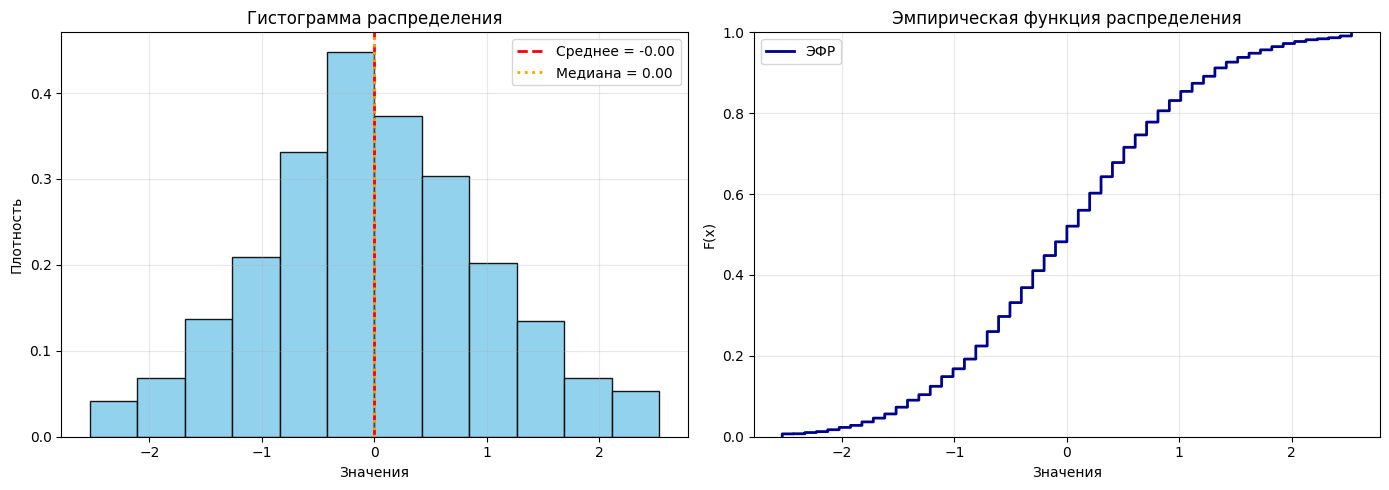

Выборочное среднее: -0.0000, стандартное отклонение: 1.0000

Число интервалов: 12
Наблюдаемые частоты: [ 52  86 174 264 419 567 472 384 256 171  87  68]
Ожидаемые частоты: [ 35.47  85.13 171.51 289.99 411.52 490.15 489.99 411.13 289.52 171.12
  84.89  35.34]

χ² = 58.8362, степени свободы = 9
Критическое значение при α=3000: nan
p-value: 0.0000
Вывод: данные не соответствуют нормальному распределению
Асимметрия = 0.0670, Z = 1.50, p = 0.1339 → не норма
Эксцесс   = -0.2132, Z = -2.39, p = 0.0169 → не норма

Общий вывод: Данные не соответствуют нормальному распределению
Распределение несимметричное и имеет отклонения в хвостах.
Корреляция выборочных и теоретических квантилей: 0.9983
Данные почти идеально соответствуют нормальному распределению


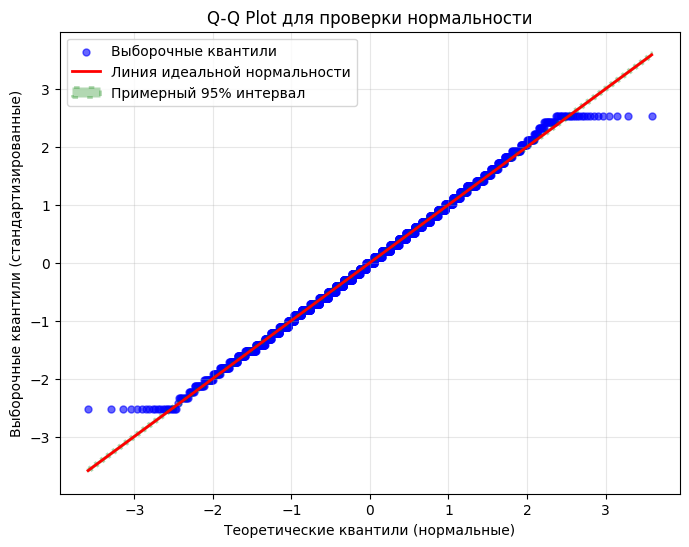

In [ ]:
col_stand = standardize_series(col)
part1and2(col_stand)


In [ ]:
def normalize_series(series: pd.Series) -> pd.Series:
    """
    Нормализация серии к диапазону [0, 1]
    """
    min_val = series.min()
    max_val = series.max()

    normalized_values = (series - min_val) / (max_val - min_val)

    return pd.Series(normalized_values, index=series.index, name=series.name)

Среднее                   0.4998
Дисперсия                 0.0391
Медиана                   0.5000
Мода                      0.5400
Квантиль 0.25             0.3600
Квантиль 0.50             0.5000
Квантиль 0.75             0.6400
Интерквартильный размах   0.2800
Эксцесс                   -0.2132
Асимметрия                0.0670


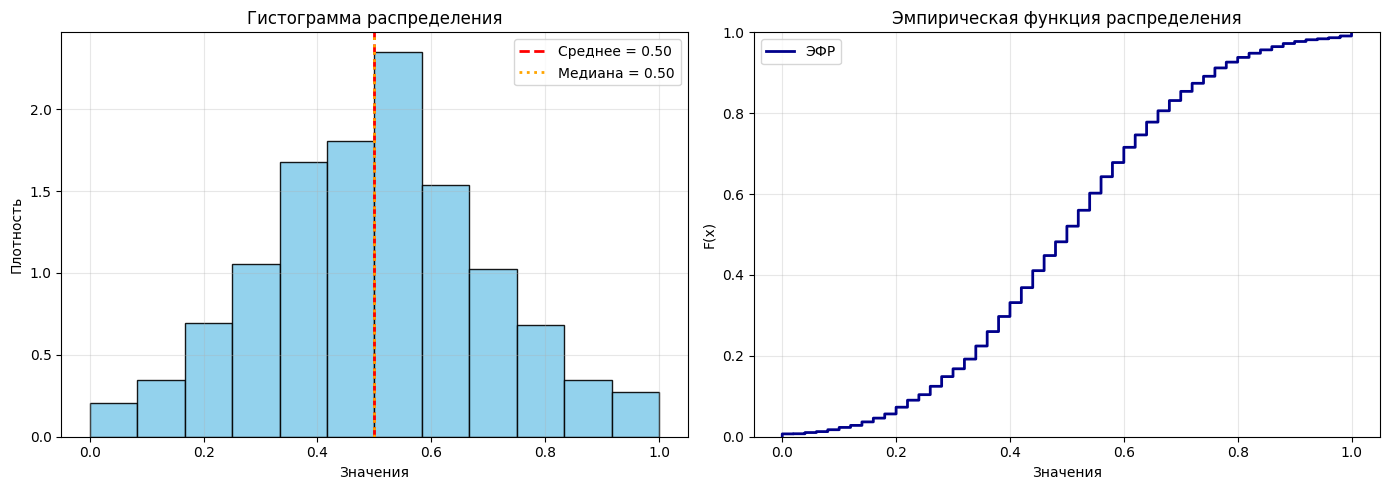

Выборочное среднее: 0.4998, стандартное отклонение: 0.1976

Число интервалов: 12
Наблюдаемые частоты: [ 52  86 174 264 419 451 588 384 256 171  87  68]
Ожидаемые частоты: [ 35.47  85.13 171.51 289.99 411.52 490.15 489.99 411.13 289.52 171.12
  84.89  35.34]

χ² = 68.8569, степени свободы = 9
Критическое значение при α=3000: nan
p-value: 0.0000
Вывод: данные не соответствуют нормальному распределению
Асимметрия = 0.0670, Z = 1.50, p = 0.1339 → не норма
Эксцесс   = -0.2132, Z = -2.39, p = 0.0169 → не норма

Общий вывод: Данные не соответствуют нормальному распределению
Распределение несимметричное и имеет отклонения в хвостах.
Корреляция выборочных и теоретических квантилей: 0.9983
Данные почти идеально соответствуют нормальному распределению


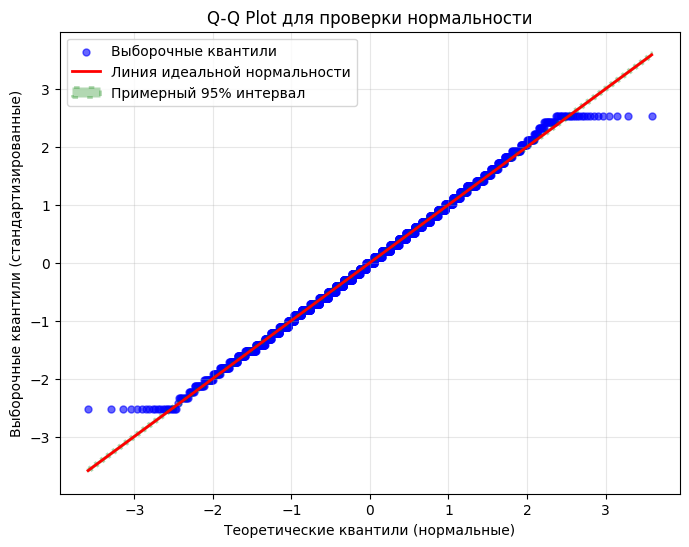

In [ ]:
time_norm = normalize_series(col)
part1and2(time_norm)

# Вывод

После стандартизации и нормализации данные изменили масштаб и смещение, но форма распределения осталась прежней.

## Логарифмирование и т.п.



=== Log (log1p) ===
Среднее                   1.2076
Дисперсия                 0.0979
Медиана                   1.2528
Мода                      1.3083
Квантиль 0.25             1.0296
Квантиль 0.50             1.2528
Квантиль 0.75             1.4351
Интерквартильный размах   0.4055
Эксцесс                   1.2591
Асимметрия                -0.8856


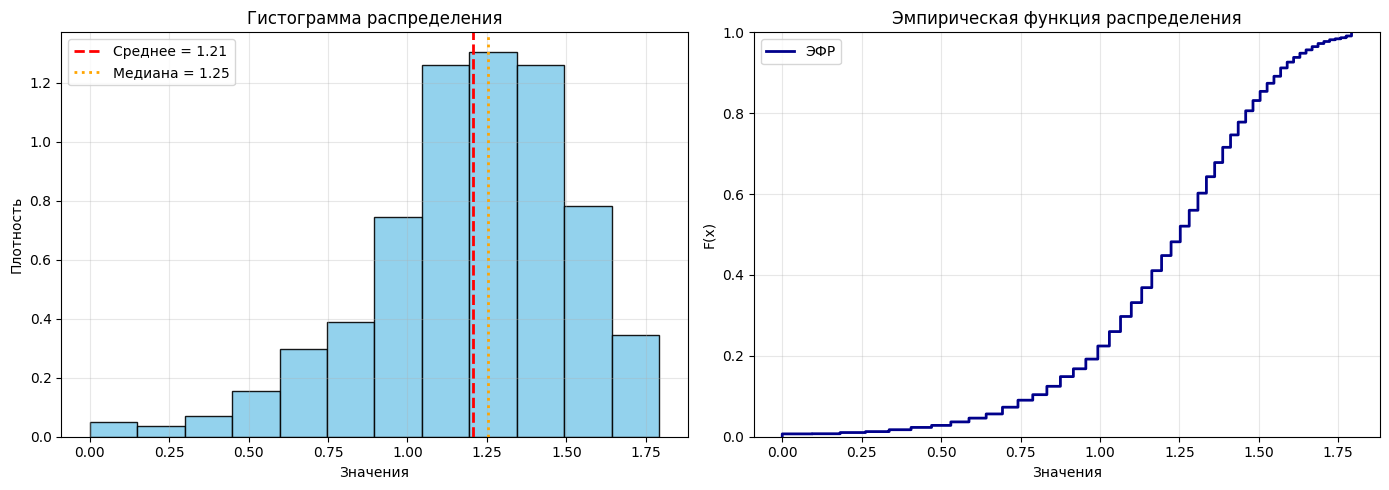

Выборочное среднее: 1.2076, стандартное отклонение: 0.3130

Число интервалов: 11
Наблюдаемые частоты: [ 38  31  69 133 175 334 564 585 565 351 155]
Ожидаемые частоты: [  5.35  17.29  53.9  134.32 267.74 426.81 544.21 555.   452.73 295.37
 154.13]

χ² = 307.5137, степени свободы = 8
Критическое значение при α=3000: nan
p-value: 0.0000
Вывод: данные не соответствуют нормальному распределению
Асимметрия = -0.8856, Z = -19.82, p = 0.0000 → не норма
Эксцесс   = 1.2591, Z = 14.11, p = 0.0000 → не норма

Общий вывод: Данные не соответствуют нормальному распределению
Распределение несимметричное и имеет отклонения в хвостах.
Корреляция выборочных и теоретических квантилей: 0.9785
Данные хорошо приближены к нормальному распределению


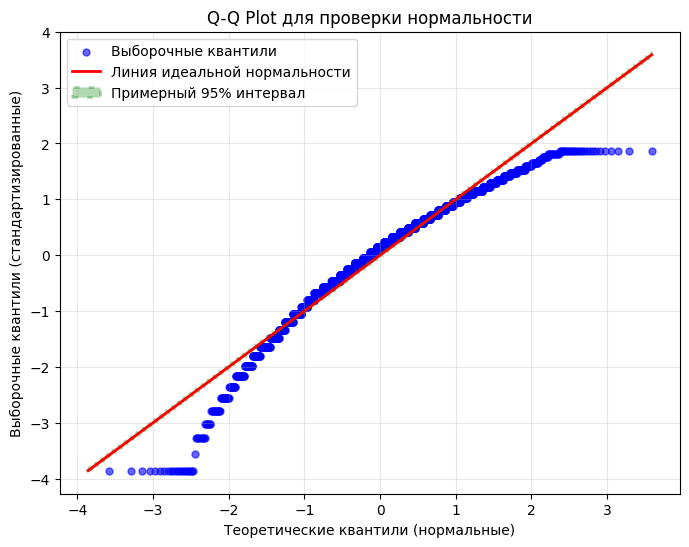



=== Arcsinh ===
Среднее                   1.5781
Дисперсия                 0.1713
Медиана                   1.6472
Мода                      1.7191
Квантиль 0.25             1.3504
Квантиль 0.50             1.6472
Квантиль 0.75             1.8799
Интерквартильный размах   0.5294
Эксцесс                   1.3299
Асимметрия                -0.9762


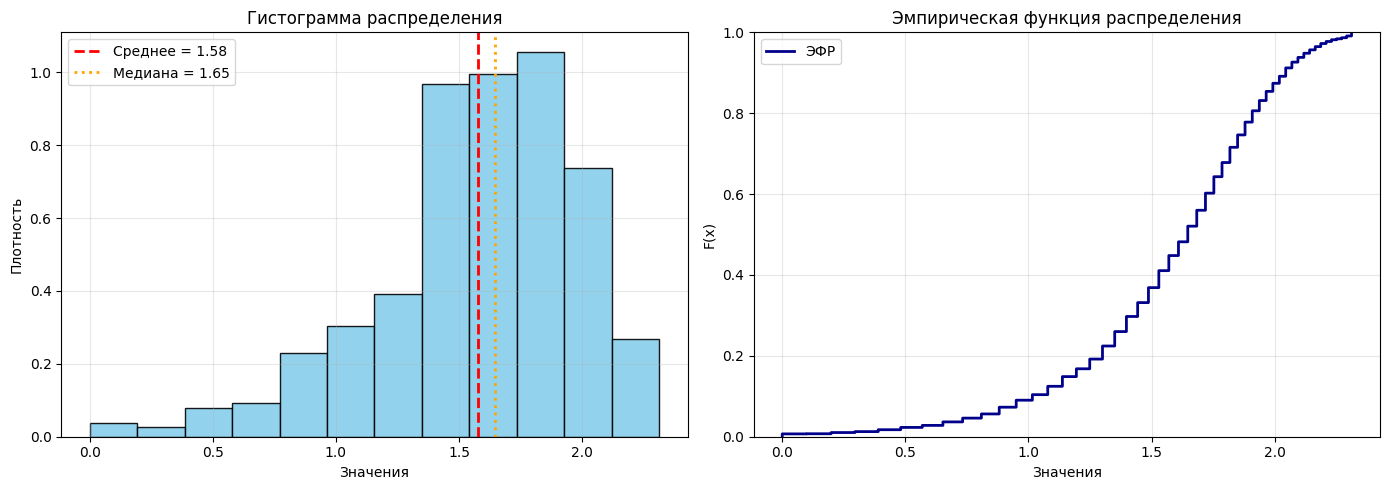

Выборочное среднее: 1.5781, стандартное отклонение: 0.4139

Число интервалов: 11
Наблюдаемые частоты: [ 38  46  54 133 175 227 559 575 611 427 155]
Ожидаемые частоты: [  5.73  17.6   53.14 129.67 255.72 407.58 525.02 546.61 459.96 312.82
 171.94]

χ² = 429.9763, степени свободы = 8
Критическое значение при α=3000: nan
p-value: 0.0000
Вывод: данные не соответствуют нормальному распределению
Асимметрия = -0.9762, Z = -21.85, p = 0.0000 → не норма
Эксцесс   = 1.3299, Z = 14.91, p = 0.0000 → не норма

Общий вывод: Данные не соответствуют нормальному распределению
Распределение несимметричное и имеет отклонения в хвостах.
Корреляция выборочных и теоретических квантилей: 0.9734
Данные хорошо приближены к нормальному распределению


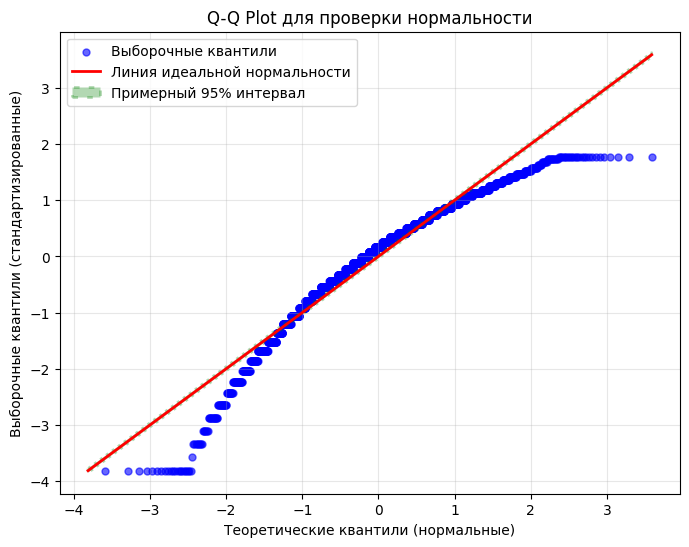



=== Square root ===
Среднее                   1.5420
Дисперсия                 0.1214
Медиана                   1.5811
Мода                      1.6432
Квантиль 0.25             1.3416
Квантиль 0.50             1.5811
Квантиль 0.75             1.7889
Интерквартильный размах   0.4472
Эксцесс                   2.0839
Асимметрия                -0.9129


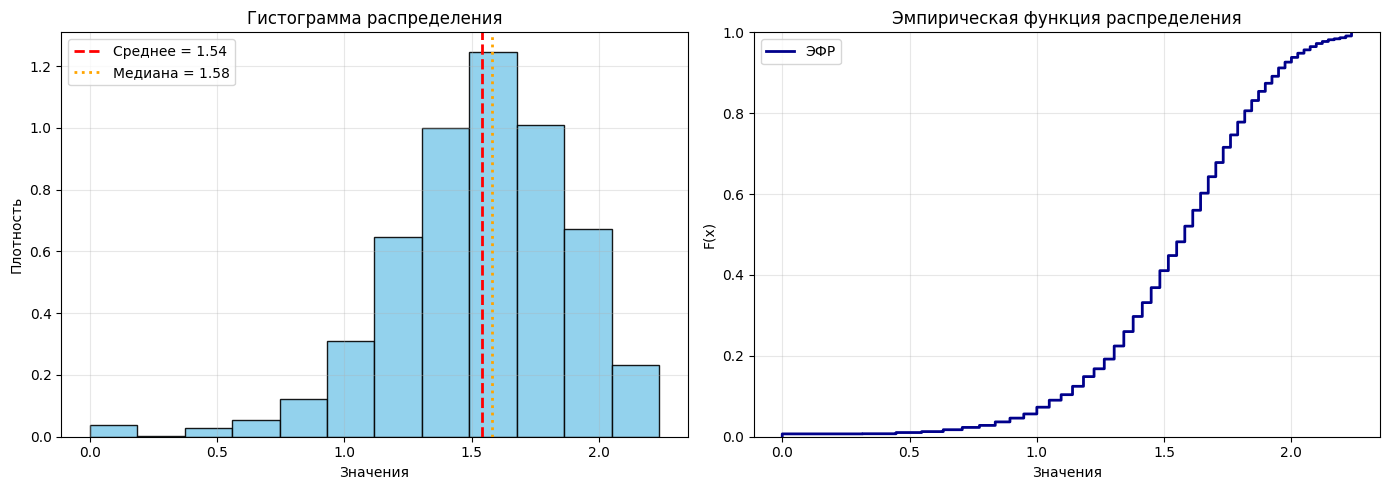

Выборочное среднее: 1.5420, стандартное отклонение: 0.3484

Число интервалов: 10
Наблюдаемые частоты: [ 38  31  69 174 361 559 697 565 376 130]
Ожидаемые частоты: [  7.15  26.14  86.36 215.69 407.3  581.63 628.16 513.07 316.92 148.03]

χ² = 177.6747, степени свободы = 7
Критическое значение при α=3000: nan
p-value: 0.0000
Вывод: данные не соответствуют нормальному распределению
Асимметрия = -0.9129, Z = -20.43, p = 0.0000 → не норма
Эксцесс   = 2.0839, Z = 23.36, p = 0.0000 → не норма

Общий вывод: Данные не соответствуют нормальному распределению
Распределение несимметричное и имеет отклонения в хвостах.
Корреляция выборочных и теоретических квантилей: 0.9789
Данные хорошо приближены к нормальному распределению


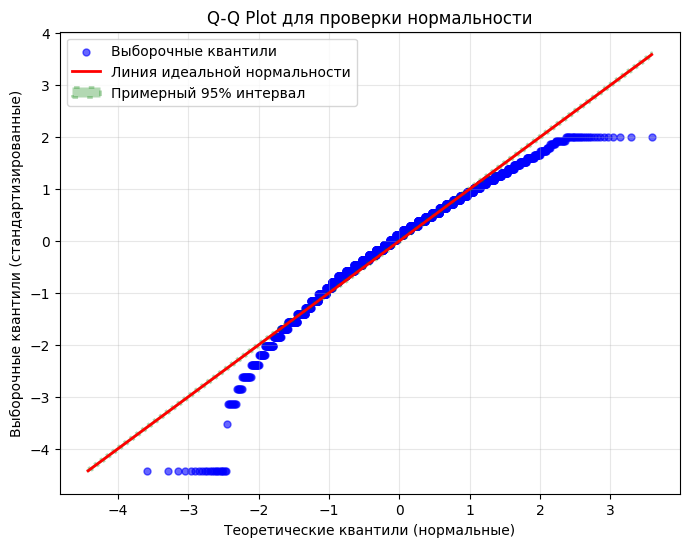



=== Box-Cox ===
Среднее                   1.2821
Дисперсия                 0.6725
Медиана                   1.3258
Мода                      1.4852
Квантиль 0.25             0.7415
Квантиль 0.50             1.3258
Квантиль 0.75             1.8719
Интерквартильный размах   1.1304
Эксцесс                   0.1276
Асимметрия                -0.2785


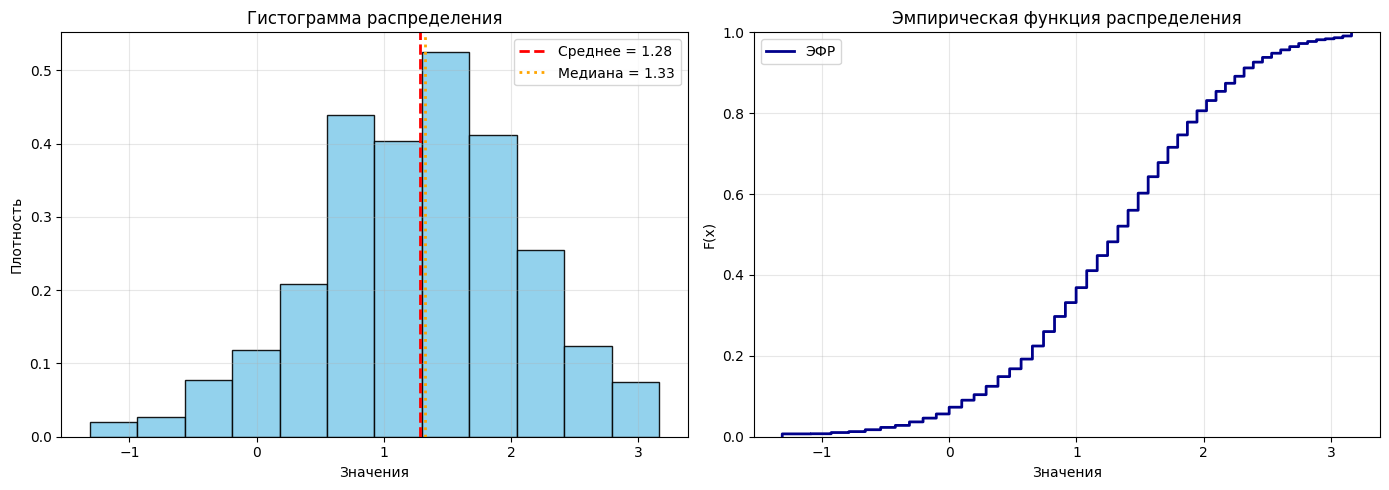

Выборочное среднее: 1.2821, стандартное отклонение: 0.8200

Число интервалов: 12
Наблюдаемые частоты: [ 22  30  86 133 233 491 451 588 460 285 138  83]
Ожидаемые частоты: [  7.8   26.16  71.66 160.14 292.08 434.74 528.12 523.59 423.67 279.78
 150.78  66.32]

χ² = 80.8259, степени свободы = 9
Критическое значение при α=3000: nan
p-value: 0.0000
Вывод: данные не соответствуют нормальному распределению
Асимметрия = -0.2785, Z = -6.23, p = 0.0000 → не норма
Эксцесс   = 0.1276, Z = 1.43, p = 0.1527 → не норма

Общий вывод: Данные не соответствуют нормальному распределению
Распределение несимметричное и имеет отклонения в хвостах.
Корреляция выборочных и теоретических квантилей: 0.9965
Данные почти идеально соответствуют нормальному распределению


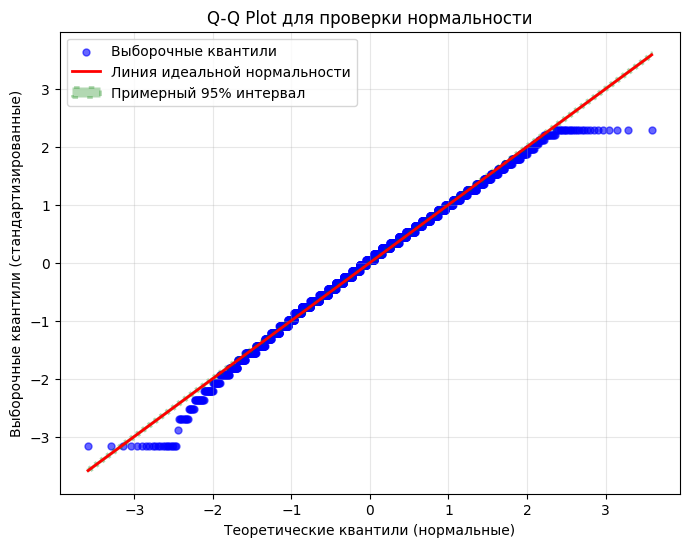

In [ ]:
def apply_transformations(series: pd.Series, transforms: dict):
    """
    transforms: словарь вида {'название': функция}
    """
    for name, func in transforms.items():
        transformed = func(series)
        if isinstance(transformed, np.ndarray):
            transformed = pd.Series(transformed, index=series.index, name=series.name)
        print(f"=== {name} ===")
        part1and2(transformed)
        print("\n")

# Словарь с трансформациями
transformations = {
    "Log (log1p)": np.log1p,
    "Arcsinh": np.arcsinh,
    "Square root": np.sqrt,
    "Box-Cox": lambda x: stats.boxcox(x + 1e-6)[0]  # если данные > 0
}

apply_transformations(col, transformations)


# Вывод:

Очевидно, что логарифмические и другие преобразования не делают распределение более нормальным. Наилучшее приближение к нормальному распределению демонстрируют исходные данные без изменений.

## IV. Сгруппируйте данные по столбцу 'School_Grade'.

1. На одном графике постройте гистограммы для каждой группы.
1. Рассчитайте среднее, дисперсию внутри каждой группы

In [ ]:
grouped = df.groupby("School_Grade")["Time_on_Social_Media"]

stats_df = grouped.agg(["count", "mean", "var"])

print(stats_df)


              count      mean       var
School_Grade                           
10th            487  2.524025  0.922734
11th            479  2.487891  0.945878
12th            529  2.463894  1.013978
7th             497  2.540040  0.919583
8th             482  2.469917  1.030382
9th             526  2.510456  1.025967


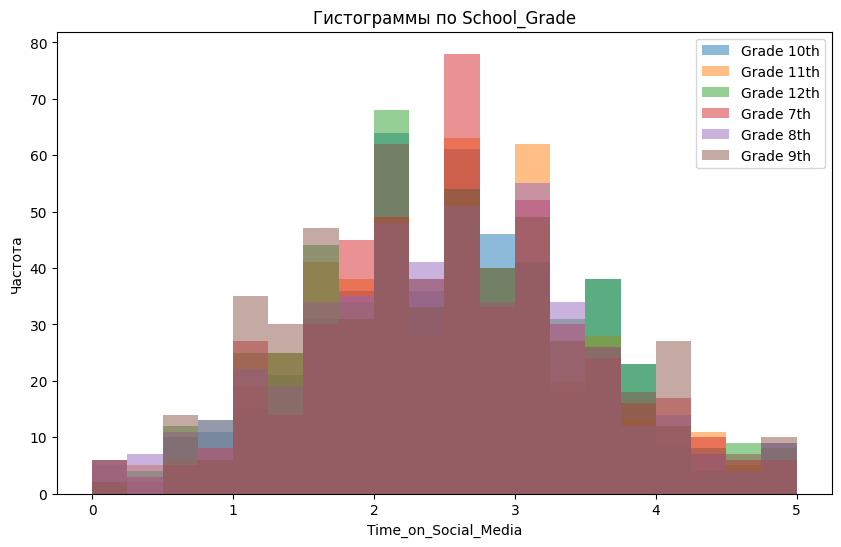

In [ ]:
plt.figure(figsize=(10,6))
for name, group in grouped:
    plt.hist(group.dropna(), bins=20, alpha=0.5, label=f"Grade {name}")

plt.title("Гистограммы по School_Grade")
plt.xlabel("Time_on_Social_Media")
plt.ylabel("Частота")
plt.legend()
plt.show()


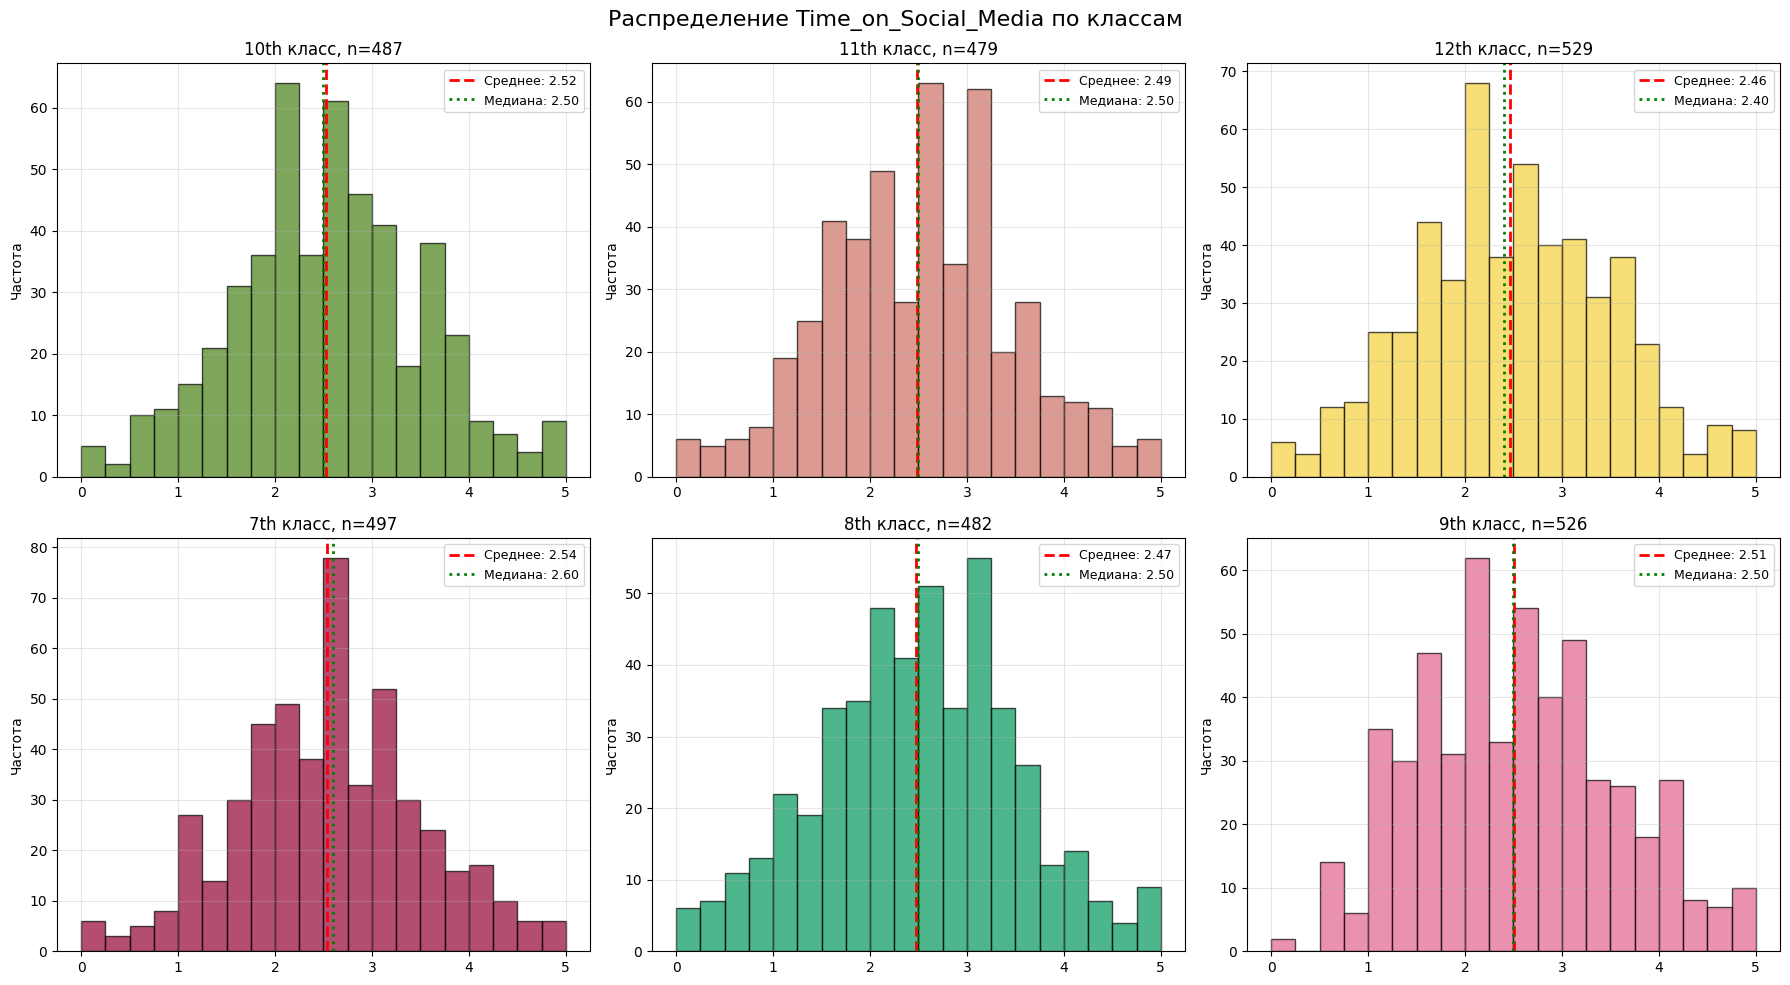

In [ ]:
grouped = df.groupby("School_Grade")["Time_on_Social_Media"]
grades = list(grouped.groups.keys())
n_grades = len(grades)

colors = np.random.rand(n_grades, 3)
n_cols = 3
n_rows = (n_grades + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten() if n_grades > 1 else [axes]

overall_min, overall_max = df["Time_on_Social_Media"].min(), df["Time_on_Social_Media"].max()
bins_range = (overall_min, overall_max)

for i, (grade, data) in enumerate(grouped):
    ax = axes[i]
    ax.hist(data.dropna(), bins=20, alpha=0.7, color=colors[i], edgecolor='black', range=bins_range)

    mean_val, median_val = data.mean(), data.median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Медиана: {median_val:.2f}')

    ax.set_title(f"{grade} класс, n={len(data)}")
    ax.set_ylabel("Частота")
    ax.grid(alpha=0.3)
    ax.legend(fontsize=9)

for j in range(n_grades, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Распределение Time_on_Social_Media по классам", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Вывод:

Размеры групп примерно равные (479–529 наблюдений), что обеспечивает надежность статистических выводов.

Средние значения времени в соцсетях по классам колеблются в узком диапазоне (2.464–2.540), что говорит о стабильности показателя.

Дисперсии внутри групп находятся в близком диапазоне (0.919–1.031), что отражает схожую вариабельность данных.

Наименьшее среднее наблюдается в 12 классе (2.464), наибольшее — в 7 классе (2.540). Что удивительно

Различия между классами по времени в соцсетях незначительные, но для оценки статистической значимости стоит провести дополнительный анализ.

Вывод: Статистики по всем классам очень похожи: внутри каждой группы показатели почти совпадают с общими значениями по выборке. Межгрупповая дисперсия показывает, что средние различаются незначительно. Наиболее близко к нормальному распределению выглядит 8 класс, что видно как по статистикам, так и по гистограмме.